In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housing = pd.read_csv(filepath_or_buffer="dataset/housing.csv",)

In [3]:
#Previous Section(create-testset.ipynb)
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0,1.5,3,4.5,6,np.inf],labels = [1,2,3,4,5])
split = StratifiedShuffleSplit(n_splits =1 , test_size = 0.2, random_state =42)
for train_index,test_index in split.split(X= housing, y=housing["income_cat"]):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]
strat_test_set.drop(columns=["income_cat"],inplace = True)
strat_train_set.drop(columns=["income_cat"],inplace = True)

C:\Users\GK\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## 1. Visualize Geographical Features 
Dataset contains a lattitude and longitude. Let's plot and visualize it. In order to do comparative analysis we do take image of california state here.

![image](diagram/california.png)

_Result : By looking visually result of below cell, the high density area namely bay area and around Los Angeles and San Diego, plus long line of fairly high density in the central valley, in perticular around Sacramento and Fresno._

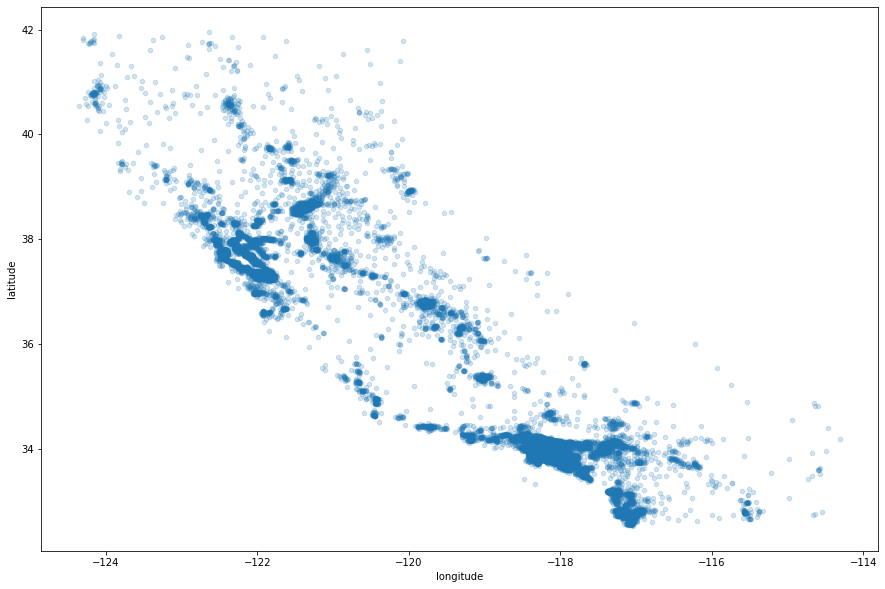

In [5]:
strat_train_set.plot(kind = 'scatter', x = "longitude", y="latitude",alpha = 0.2,figsize=(15,10))

***Include the housing price in plot***

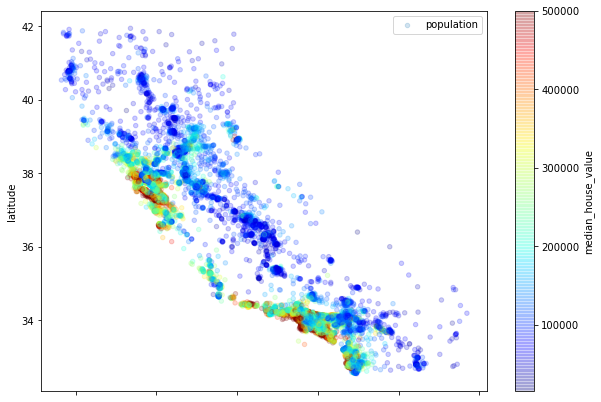

In [6]:
strat_train_set.plot(kind = "scatter" , x = "longitude", y = "latitude", figsize=(10,7),alpha = 0.2,label = "population", c = "median_house_value",cmap = plt.get_cmap("jet"),colorbar=True)
plt.legend()

### **Peceptions**   
This above image tells you that the housing price are very much related to location which is close to ocean. It's worthy to add or invent new attribute like ***proximity*** by finding out dense cluster centroids. For Example in North California the housing price is not too high while in bay area its too much costly.

## 2. Correlations 
---------

As we have already donne pratice above, We are dig more for another combination of variable. `corr()` method in pandas is used to calculate correlation matrix. It range from -1 to 1. where 1 represents and positive linear corelation and -1 for negative corelation. 

In [7]:
corr_matrix = strat_train_set.corr()

In [8]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

#### Important 

One last thing you may want to do before actually preparing the data for Machine
Learning algorithms is to try out various attribute combinations. For example, the
total number of rooms in a district is not very useful if you don’t know how many
households there are. What you really want is the number of rooms per household.
Similarly, the total number of bedrooms by itself is not very useful: you probably
want to compare it to the number of rooms. And the population per household also
seems like an interesting attribute combination to look at. Let’s create these new
attributes:

In [9]:
strat_train_set["rooms_per_household"] = strat_train_set["total_rooms"]/strat_train_set["households"]
strat_train_set["bedrooms_per_room"] =strat_train_set["total_bedrooms"]/strat_train_set["total_rooms"]
strat_train_set["population_per_household"]=strat_train_set["population"]/strat_train_set["households"]


C:\Users\GK\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\GK\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\GK\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [13]:
corr_matrix = strat_train_set.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64